<a href="https://colab.research.google.com/github/DilaMustakim/My_NBA_game_analysis/blob/main/AutoCostForGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing nesessary libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Loading dataset 

def load_dataset():
  csv_content = "/content/auto_costs.csv"
  df = pd.read_csv(csv_content)
  return df 

data = load_dataset()

data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:

# Summarizing dataset

def print_summarize_dataset(dataset):
  print("Dataset dimension:\n")
  print(dataset.shape)
  print("\n\nFirst 10 rows of dataset:\n")
  print(dataset.head(10))
  print("\n\nStatistical summary:\n")
  print(dataset.describe())
  print("\n\nData types:\n")
  print(dataset.dtypes)

print_summarize_dataset(data)

Dataset dimension:

(205, 26)


First 10 rows of dataset:

   ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   
5   6          2                  audi fox       gas        std         two   
6   7          1                audi 100ls       gas        std        four   
7   8          1                 audi 5000       gas        std        four   
8   9          1                 audi 4000       gas      turbo        four   
9  10          0       audi 5000s (diesel)       gas      turbo         two   

       carbody drivewheels enginelocation  wheelbase  ...  enginesize  

In [ ]:
# Check missing values

def miss_val(data):
  print("We haven't any missing values:\n\n", data.isnull().sum())

miss_val(data)

We haven't any missing values:

 ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# Cleaning and Pre-processing

def clean_dataset(dataset):
  dataset['name'] = dataset['name'].str.split(' ',expand=True)[0]
  dataset['name'] = dataset['name'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
  dataset = dataset.drop("ID", 1)
  # dataset['symboling']=dataset['symboling'].astype('str')
  return dataset

data = clean_dataset(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


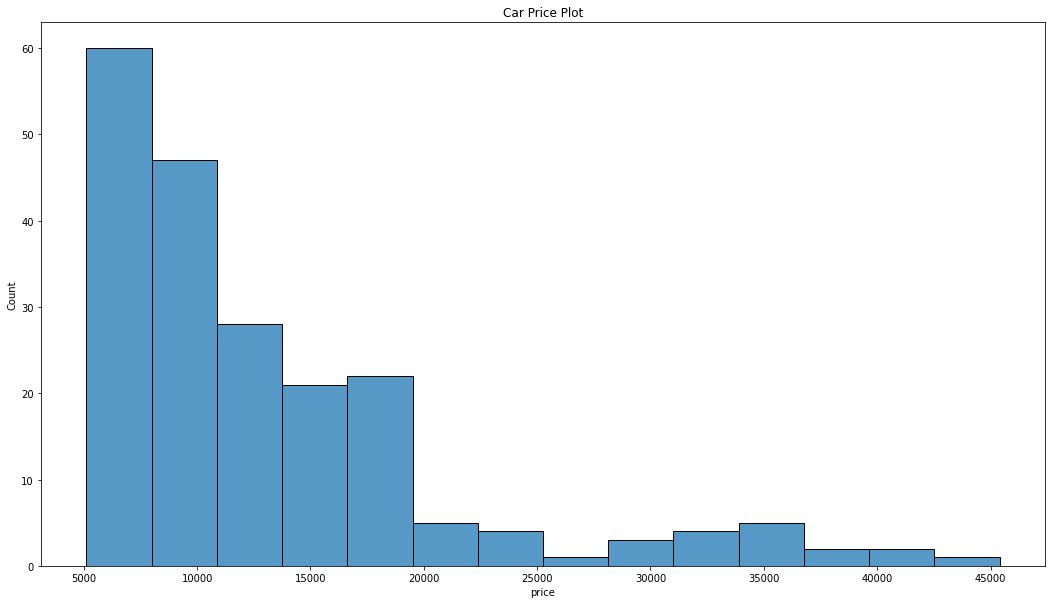

In [ ]:
plt.figure(figsize=(18, 10))
plt.title('Car Price Plot')
sns.histplot(data['price'])
plt.show()

In [ ]:

# Seperation of Categorical and Numerical

cat_col = data.select_dtypes(include=['object']).columns
df_cat = data[cat_col]
num_col = data.select_dtypes(exclude=['object']).columns
df_num = data[cat_col]

In [ ]:
df_cat

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
# Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_cat:
  data[col] = le.fit_transform(data[col])      


In [ ]:

data.head()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Checking Correlation 
data.corr()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.098541,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
name,-0.098541,1.000000,-0.065597,0.060091,-0.143542,0.053781,-0.007548,0.060707,0.061688,0.057615,...,-0.157652,0.146779,0.201519,-0.201044,0.086201,-0.091439,-0.143058,0.053777,0.055715,-0.173728
fueltypes,0.194311,-0.065597,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.060091,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumbers,0.664073,-0.143542,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,0.053781,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheels,-0.041671,-0.007548,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.060707,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.061688,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.057615,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


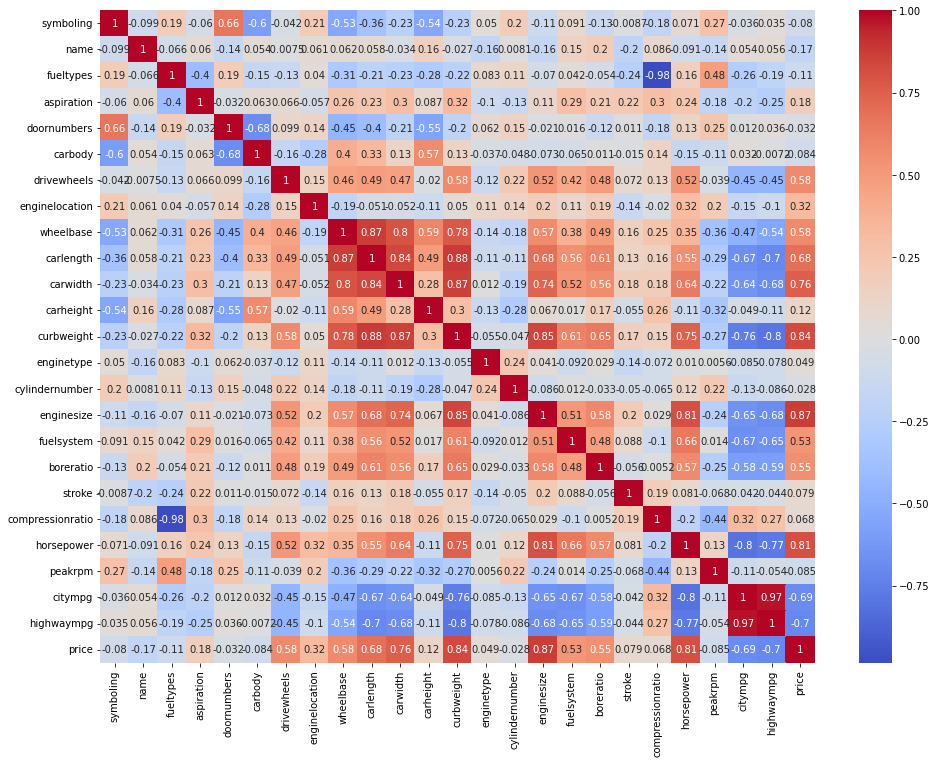

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') 
plt.show()

In [ ]:
# let's split data to train and test data

from sklearn.model_selection import train_test_split

x = data.drop(['price'],axis=1)
y = data['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
# Here training with LinearRegression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
 
lm = LinearRegression() 
lm.fit(x_train, y_train) 
y_pred = lm.predict(x_test) 
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8941014687441119


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# Here training with CatBoostRegressor model

from catboost import CatBoostRegressor 
 
model = CatBoostRegressor(iterations=6542, learning_rate=0.03) 
model.fit( 
	x_train, y_train, 
	eval_set=(x_test, y_test), 
) 
print(model.score(x, y))

Streaming output truncated to the last 5000 lines.
1548:	learn: 309.5942331	test: 2642.6205742	best: 2608.0999987 (407)	total: 1.49s	remaining: 4.81s
1549:	learn: 309.5122073	test: 2642.7010024	best: 2608.0999987 (407)	total: 1.49s	remaining: 4.81s
1550:	learn: 309.4517856	test: 2642.7703083	best: 2608.0999987 (407)	total: 1.49s	remaining: 4.81s
1551:	learn: 309.4106406	test: 2642.8773640	best: 2608.0999987 (407)	total: 1.5s	remaining: 4.81s
1552:	learn: 309.3929297	test: 2642.9150914	best: 2608.0999987 (407)	total: 1.5s	remaining: 4.81s
1553:	learn: 309.3662449	test: 2642.8997601	best: 2608.0999987 (407)	total: 1.5s	remaining: 4.8s
1554:	learn: 309.3293308	test: 2642.8550686	best: 2608.0999987 (407)	total: 1.5s	remaining: 4.8s
1555:	learn: 309.3024629	test: 2642.8173789	best: 2608.0999987 (407)	total: 1.5s	remaining: 4.8s
1556:	learn: 309.2755302	test: 2642.8232923	best: 2608.0999987 (407)	total: 1.5s	remaining: 4.8s
1557:	learn: 309.2450065	test: 2642.7825777	best: 2608.0999987 (407)